REGRESION MULTIPLE -> técnica estadística utilizada para modelar la relación entre una variable dependiente (respuesta) y dos o más variables independientes (predictoras).

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [37]:
# Cargamos el archivo como un DataFrame
df = pd.read_csv("data//housing.data", delim_whitespace = True, header = None)

In [38]:
# Establecemos los nombres de las columnas
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [39]:
df.shape

(506, 14)

In [40]:
x = df.iloc[:, :-1]

In [41]:
y = df['MEDV']

In [42]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

STATSMODELS

In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [45]:
# Agregamos una columna con solo 1s a los datos, para asegurar que la formula tenga un termino fijo
x_constant = sm.add_constant(x)

In [46]:
# Convertimos los datos con la nueva columna en un formato DataFrame
pd.DataFrame(x_constant)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [47]:
# Linea para que nos muestre la documentacion con el '?'
sm.OLS?

Init signature: sm.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
Docstring:     
Ordinary Least Squares

Parameters
----------
endog : array_like
    A 1-d endogenous response variable. The dependent variable.
exog : array_like
    A nobs x k array where `nobs` is the number of observations and `k`
    is the number of regressors. An intercept is not included by default
    and should be added by the user. See
    :func:`statsmodels.tools.add_constant`.
missing : str
    Available options are 'none', 'drop', and 'raise'. If 'none', no nan
    checking is done. If 'drop', any observations with nans are dropped.
    If 'raise', an error is raised. Default is 'none'.
hasconst : None or bool
    Indicates whether the RHS includes a user-supplied constant. If True,
    a constant is not checked for and k_constant is set to 1 and all
    result statistics are calculated as if a constant is present. If
    False, a constant is not checked for and k_constant is set to 0.
**kwa

In [51]:
# Crea un modelo que intente predecir los valores de 'y' usando los datos en x_constant
model = sm.OLS(y, x_constant)

In [49]:
# Usa los datos que le dimos para aprender cuál es la mejor combinación de factores que explican y
lr = model.fit()

In [50]:
# Muestra una tabla con:
    # Coeficientes → qué tan importante es cada factor (ej. habitaciones, edad del edificio, etc.)
    # Valores p → indican si cada factor es realmente útil o es solo ruido.
    # R² → qué tan bien se ajusta el modelo a los datos (si es cercano a 1, está muy bien).
    # Otros datos estadisticos
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          6.72e-135
Time:                        08:44:34   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

🧠 1. Calidad general del modelo
🔷 R-squared (R²) = 0.741
Esto indica que el 74.1% de la variación en el precio (MEDV) puede explicarse por las variables del modelo.
Es un buen valor, no perfecto (100%) pero bastante fuerte para modelos reales.
🔷 Adj. R-squared = 0.734
Similar a R² pero ajustado al número de variables. Útil para evitar sobreajuste.
Mientras más se acerque a R², mejor.

🔎 2. Variables significativas
Fíjate en la columna P>|t| (valor p):
Si el valor es menor a 0.05, entonces esa variable es estadísticamente significativa.
En tu tabla, las variables significativas (porque tienen P < 0.05) son:
CRIM (criminalidad)
ZN
CHAS (río Charles)
NOX (contaminación)
RM (habitaciones promedio)
DIS (distancia a centros de empleo)
RAD
PTRATIO (alumnos por profesor)
B
LSTAT (población con bajo estatus)

👀 Variables NO significativas:
INDUS
AGE
TAX
Estas últimas podrías considerar eliminarlas si estás buscando un modelo más simple (aunque con cuidado).

🧮 3. Dirección del efecto: coeficiente (coef)
Esto te dice cómo influye cada variable en el precio de la vivienda.
🔺 Positivos (aumentan el precio):
RM: cada habitación extra aumenta el precio en $3,809.9
CHAS: estar junto al río Charles aumenta el precio
ZN, RAD, B

🔻 Negativos (reducen el precio):
NOX: más contaminación = menor precio
DIS: más lejos del centro = menor precio
PTRATIO: más alumnos por maestro = menor precio
LSTAT: mayor % de personas con bajo estatus = menor precio

🧪 4. Estadísticas de normalidad y errores
Omnibus, Jarque-Bera, Skew, Kurtosis: indican si los residuos (errores del modelo) tienen una distribución normal.
En tu caso, no es perfectamente normal (probabilidades cercanas a 0).
Esto no invalida el modelo, pero sugiere que puedes explorar mejoras (como transformar variables o usar modelos más complejos).

SATATSMODELS.FORMULA.API

In [53]:
# Forma alternativa (y más intuitiva) de hacer regresión lineal múltiple con statsmodels, usando la interfaz de fórmulas tipo R o patsy
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data = df)
mlr = form_lr.fit()

In [54]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          6.72e-135
Time:                        09:04:05   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', data = df)
mlr = form_lr.fit()

In [58]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          5.54e-137
Time:                        09:07:24   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

EJERCICIO -> crea un modelo usando CRIM, ZN, CHAS, NOX

In [76]:
# Agregamos una columna con solo 1s a los datos, para asegurar que la formula tenga un termino fijo
x_constant_e = sm.add_constant(x)
x_constant_e.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [86]:
# Nos quedamos con las columnas que nos marca el ejercicio
x_constant_e = x_constant_e.drop(columns = [col for col in x_constant_e.columns if col not in ['const', 'CRIM', 'ZN', 'CHAS', 'NOX']])

['const', 'CRIM', 'ZN', 'CHAS', 'NOX']


In [87]:
# Convertimos los datos con la nueva columna en un formato DataFrame
pd.DataFrame(x_constant_e)

,const,CRIM,ZN,CHAS,NOX
0,1.0,0.00632,18.0,0,0.538
1,1.0,0.02731,0.0,0,0.469
2,1.0,0.02729,0.0,0,0.469
3,1.0,0.03237,0.0,0,0.458
4,1.0,0.06905,0.0,0,0.458
...,...,...,...,...,...
501,1.0,0.06263,0.0,0,0.573
502,1.0,0.04527,0.0,0,0.573
503,1.0,0.06076,0.0,0,0.573
504,1.0,0.10959,0.0,0,0.573


In [89]:
# Crea un modelo que intente predecir los valores de 'y' usando los datos en x_constant
model_e = sm.OLS(y, x_constant_e)

In [90]:
# Usa los datos que le dimos para aprender cuál es la mejor combinación de factores que explican y
lr_e = model_e.fit()

In [91]:
lr_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     53.72
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           1.14e-37
Time:                        09:23:30   Log-Likelihood:                -1749.9
No. Observations:                 506   AIC:                             3510.
Df Residuals:                     501   BIC:                             3531.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8818      2.157     15.245      0.000      28.644      37.119
CRIM          -0.2515      0.044     -5.676      0.000      -0.339      -0.164
ZN             0.0768      0.017      4.462      0.000       0.043       0.111
CHAS           6.9811      1.367      5.109      0.000       4.296       9.666
NOX          -19.4631      3.768     -5.166      0.000     -26.865     -12.061
==============================================================================
Omnibus:                      172.725   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.442
Skew:                           1.680   Prob(JB):                    4.71e-105
Kurtosis:                       6.390   Cond. No.                         327.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CORRELATION MATRIX -> tabla cuadrada donde cada celda (i,j) contiene el coeficiente de correlación de Pearson entre la variable i y la variable 
j. Sirve para cuantificar la fuerza y dirección (positiva o negativa) de la relación lineal entre pares de variables.

In [92]:
# Mostramos decimales de una manera mas clara
pd.options.display.float_format = '{:,.2f}'.format
# Creamos la matriz de correlaciones
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [94]:
# Filtramos las correlaciones fuertes, las menores a 0.6 se igualan a 0
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,0.00,0.00,0.00
ZN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00
INDUS,0.00,0.00,1.00,0.00,0.76,0.00,0.64,-0.71,0.00,0.72,0.00,0.00,0.60,0.00
CHAS,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NOX,0.00,0.00,0.76,0.00,1.00,0.00,0.73,-0.77,0.61,0.67,0.00,0.00,0.00,0.00
RM,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.61,0.70
AGE,0.00,0.00,0.64,0.00,0.73,0.00,1.00,-0.75,0.00,0.00,0.00,0.00,0.60,0.00
DIS,0.00,0.66,-0.71,0.00,-0.77,0.00,-0.75,1.00,0.00,0.00,0.00,0.00,0.00,0.00
RAD,0.63,0.00,0.00,0.00,0.61,0.00,0.00,0.00,1.00,0.91,0.00,0.00,0.00,0.00
TAX,0.00,0.00,0.72,0.00,0.67,0.00,0.00,0.00,0.91,1.00,0.00,0.00,0.00,0.00


<function matplotlib.pyplot.show(close=None, block=None)>

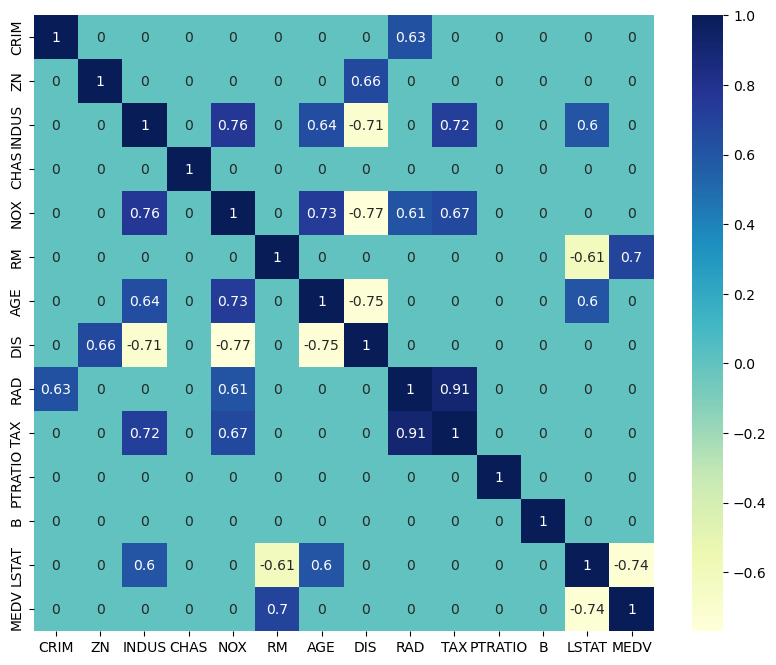

In [99]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')
plt.show

DETECTING COLLINEARITY WITH EIGENVECTORS -> análisis matemático de la matriz de covarianza (o correlación) de tus variables predictoras para descubrir combinaciones lineales casi redundantes.

In [100]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())

In [102]:
pd.options.display.float_format = '{:,.4f}'.format
pd.Series(eigenvalues).sort_values()

8    0.0603
9    0.1340
12   0.1830
13   0.2128
11   0.2523
10   0.2773
7    0.4031
6    0.5354
5    0.6600
4    0.8509
3    0.8865
2    1.3489
1    1.6495
0    6.5460
dtype: float64

Podemos ver la varianza de los datos; cuanto mayor, es el numero mas se estiran los datos; cuanto menor, direcciones donde casi no hay variacion.
Cuanto mas cercanos son los valores a 0, señalan colinealidad, lo que indica que son variables que aportan informacion casi identica. (Menores a 0.2)

Numero de condicion -> varianza mayor / varianza menor
Un numero de condicion muy alto indica que los coeficientes de regresion son muy inestables, pequeños cambios en los datos podrian generar grandes alteraciones

In [104]:
# Extrameos uno de los eigenvectores (RAD) de la matriz y luego has ordenado sus componentes por magnitud. Cada componente de ese vector es un peso que indica cuánto “entra”
    #cada variable en esa combinación lineal
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending = False)

9    0.6988
8    0.6350
2    0.2355
13   0.1341
1    0.0963
4    0.0876
12   0.0831
0    0.0591
10   0.0557
7    0.0471
6    0.0382
3    0.0235
11   0.0162
5    0.0072
dtype: float64

▶️ ¿Qué conclusión práctica sacas?

TAX y RAD tienen los pesos más altos (casi 0.7), por eso esa combinación de “0.7·TAX + 0.63·RAD + …” casi nunca cambia: TAX y RAD son casi la misma cosa en este dataset.

Ese es el núcleo de la multicolinealidad: dos variables que aportan idéntica información.

El resto de variables (INDUS, NOX, LSTAT…) entran muy poco en esta mezcla, así que el problema principal son TAX y RAD.

In [105]:
# Los tres primeros resultados tienen una carga alta comparados con el resto. Esto quiere decir que son los facotres que nos estan 
    # causando multicolinealidad
print(df.columns[2], df.columns[8], df.columns[9])

INDUS RAD TAX


🔑 Resumen

Incluir las tres variables puramente (sin más) no mejora la capacidad predictiva global, pero sí hace que sus coeficientes individuales sean poco fiables.

Romper la redundancia (mediante regularización, PCA o agregación) te permite conservar la información de TAX, RAD e INDUS sin perder la estabilidad ni la interpretabilidad de los coeficientes.

REVESTING FEATURE IMPORTANCE AND EXTRACTIONS

In [106]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296.0000,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242.0000,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242.0000,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222.0000,18.7000,394.6300,2.9400,33.4000
4,0.0691,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222.0000,18.7000,396.9000,5.3300,36.2000


(array([ 54., 100., 108.,  32.,  74.,   1.,   0.,   0.,   0., 137.]),
 array([187. , 239.4, 291.8, 344.2, 396.6, 449. , 501.4, 553.8, 606.2,
        658.6, 711. ]),
 <BarContainer object of 10 artists>)

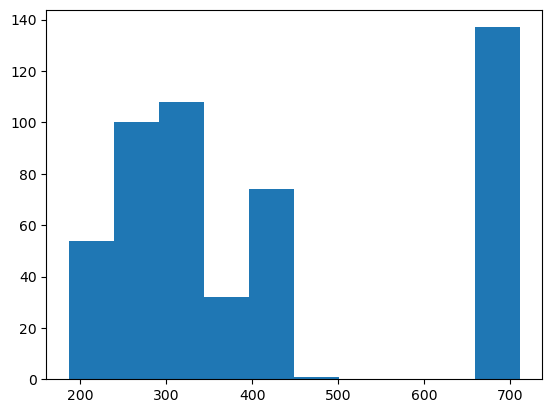

In [107]:
plt.hist(df['TAX'])

(array([75., 80., 89., 60., 78., 30., 57., 21.,  0., 16.]),
 array([0.385 , 0.4336, 0.4822, 0.5308, 0.5794, 0.628 , 0.6766, 0.7252,
        0.7738, 0.8224, 0.871 ]),
 <BarContainer object of 10 artists>)

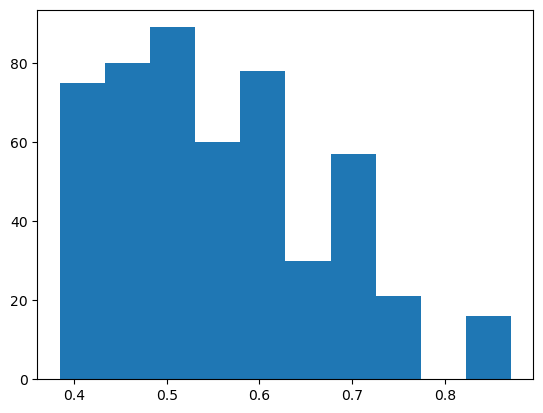

In [108]:
plt.hist(df['NOX'])

STANDARDISE VARIABLE TO IDENTIFY KEY FEATURES

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
model = LinearRegression()

In [112]:
model.fit(x, y)

LinearRegression()

In [114]:
# Construimos un DataFrame que asocia cada coeficiente con el nombre de la columna correspondiente
# Usamos list() -> para envolver al zip(), que es un iterador que solo se puede recorrer una vez,de forma que con el list podemos pasar una estructura completa
# zip() -> empareja el coeficiente con el nombre de la variable
# set_index() -> seleccionamos que columna se tomara como indice de la fila
result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns = ['coeficient', 'name']).set_index('name')
# Ordenamos los coeficientes
np.abs(result).sort_values(by = 'coeficient', ascending = False)

,coeficient
name,
NOX,17.7666
RM,3.8099
CHAS,2.6867
DIS,1.4756
PTRATIO,0.9527
LSTAT,0.5248
RAD,0.3060
CRIM,0.1080
ZN,0.0464


In [117]:
# Lo mismo de antes pero normalizando
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Creamos un objeto scaler que sabe como centrar y escalar datos
scaler = StandardScaler()
# Aplicamos una tuberia que primero aplica scaler y luego sobre el resultado entrena al modelo
standard_coef_linear_reg = make_pipeline(scaler, model)

In [118]:
# Entrenamos el pipeline completo
standard_coef_linear_reg.fit(x, y)
# Extraemos los coeficientes del segundo paso del pipeline (steps[1]) que es nuestro LinearRegresion, el cual contiene una tupla por eso se añade otro [1], para
   # quedarnos con el modelo ya entrenado con datos estandarizados
result = pd.DataFrame(list(zip(standard_coef_linear_reg.steps[1][1].coef_, df.columns)), columns = ['coeficient', 'name']).set_index('name')
np.abs(result).sort_values(by = 'coeficient', ascending = False)

,coeficient
name,
LSTAT,3.7436
DIS,3.1040
RM,2.6742
RAD,2.6622
TAX,2.0768
PTRATIO,2.0606
NOX,2.0567
ZN,1.0816
CRIM,0.9281


USE r^2 TO IDENTIFY KEY FEATURES -> forma muy sencilla de medir “qué tanto aporta cada variable”

In [119]:
from sklearn.metrics import r2_score

In [122]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data = df)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(df))

0.7405837482416912

Quitamos LSTAT

In [123]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B', data = df)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(df))

0.6840949696704561

¿Qué nos dice eso?
Que LSTAT aportaba una buena cantidad de “poder explicativo”. Al quitarla, el modelo ya no predice tan bien.

Quitamos la edad

In [125]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', data = df)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(df))

0.7405822802569575

¿Qué significa?
Que AGE casi no aportaba información extra una vez que ya tenía las otras variables. Su ausencia no empeora el ajuste.